### Confusion matrix
Table that describes the performance of a classification model

### Basic terminology
* True Positives (TP): we correctly predicted that they do have diabetes
* True Negatives (TN): we correctly predicted that they don't have diabetes
* False Positives (FP): we incorrectly predicted that they do have diabetes (a "Type I error")
* False Negatives (FN): we incorrectly predicted that they don't have diabetes (a "Type II error") false alarm

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import statsmodels.api as sm
from statsmodels import regression
import matplotlib.pyplot as plt
from __future__ import print_function
from sklearn.preprocessing import binarize
from IPython.core.display import HTML 
from IPython.core.display import Image, display
%matplotlib inline

In [3]:
#get data
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data'
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv(url, header=None, names=col_names)
pima.head(3)

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [4]:
# define X and y
feature_cols = ['pregnant', 'insulin', 'bmi', 'age']
X = pima[feature_cols]
y = pima.label

In [19]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
# make class predictions for the testing set
y_pred_class = logreg.predict(X_test)

In [20]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print(TP / float(TP + FN))

0.241935483871


### Adjusting the Threshold

In [21]:
# store the predicted probabilities for class 1
y_pred_prob = logreg.predict_proba(X_test)[:, 1]
y_pred_prob[0:10]
y_pred_class2 = binarize([y_pred_prob], 0.2)[0]

In [65]:
print(y_pred_prob[0:10])
print(y_pred_class[0:10])
print(y_pred_class2[0:10])

[ 0.36752429  0.28356344  0.28895886  0.4141062   0.15896027  0.17065156
  0.49889026  0.51341541  0.27678612  0.67189438]
[0 0 0 0 0 0 0 1 0 1]
[ 1.  1.  1.  1.  0.  0.  1.  1.  1.  1.]


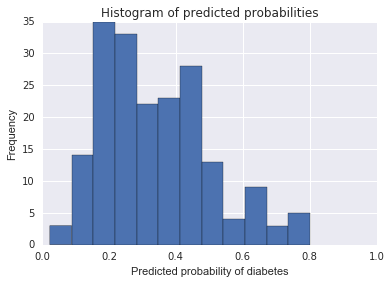

In [68]:
# histogram of predicted probabilities
plt.hist(y_pred_prob, bins=12)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')

In [83]:
# save confusion matrix and slice into four pieces
print('Before Threshold Adjustment')
confusion = metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print('Sensitivity:',TP / float(TP + FN))
print('Specificity:',TN / float(TN + FP))
print('')
print('After Threshold Adjustment')
confusion = metrics.confusion_matrix(y_test, y_pred_class2)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print('Sensitivity:',TP / float(TP + FN))
print('Specificity:',TN / float(TN + FP))

Before Threshold Adjustment
Sensitivity: 0.241935483871
Specificity: 0.907692307692

After Threshold Adjustment
Sensitivity: 0.951612903226
Specificity: 0.323076923077


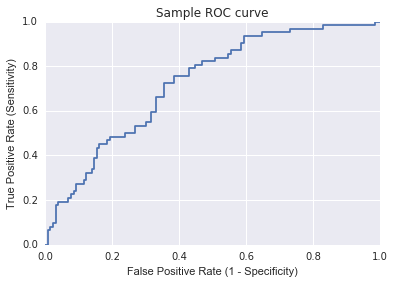

In [94]:
# Sensitivity: Among people with disease, how often is the test right?
# TP / (TP + FN) Denominator is people with disease

# Specificity: People without disease
# TN / (TN + FP) Denominator is people without disease

# IMPORTANT: first argument is true values, second argument is predicted probabilities
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('Sample ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [92]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('1-Specificity:', fpr[thresholds > threshold][-1])
print(evaluate_threshold(0.5))
print(evaluate_threshold(0.3))

Sensitivity: 0.241935483871
1-Specificity: 0.0923076923077
None
Sensitivity: 0.725806451613
1-Specificity: 0.384615384615
None


In [93]:
###AUC is the percentage of the ROC plot that is underneath the curve:

# IMPORTANT: first argument is true values, second argument is predicted probabilities
print(metrics.roc_auc_score(y_test, y_pred_prob))


0.724565756824


### AUC is useful as a single number summary of classifier performance.
* If you randomly chose one positive and one negative observation, AUC represents the likelihood that your classifier will assign a higher predicted probability to the positive observation.
* AUC is useful even when there is high class imbalance (unlike classification accuracy).

In [50]:
#create confusion matrix
k_range=np.arange(0, 1, 0.1)
k_scores = []
for k in k_range:
    y_pred_class2 = binarize([y_pred_prob], k)[0]
    confusion = metrics.confusion_matrix(y_test, y_pred_class2)
    matrix = []
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    TPR = TP / float(TP + FN)
    FPR = FP / float(TN + FP)
    k_scores.append([k, TPR, FPR])
    print(confusion)

[[  0 130]
 [  0  62]]
[[  3 127]
 [  1  61]]
[[42 88]
 [ 3 59]]
[[80 50]
 [16 46]]
[[97 33]
 [31 31]]
[[118  12]
 [ 47  15]]
[[125   5]
 [ 50  12]]
[[129   1]
 [ 58   4]]
[[129   1]
 [ 62   0]]
[[130   0]
 [ 62   0]]


In [51]:
k_scores

[[0.0, 1.0, 1.0],
 [0.10000000000000001, 0.9838709677419355, 0.97692307692307689],
 [0.20000000000000001, 0.95161290322580649, 0.67692307692307696],
 [0.30000000000000004, 0.74193548387096775, 0.38461538461538464],
 [0.40000000000000002, 0.5, 0.25384615384615383],
 [0.5, 0.24193548387096775, 0.092307692307692313],
 [0.60000000000000009, 0.19354838709677419, 0.038461538461538464],
 [0.70000000000000007, 0.064516129032258063, 0.0076923076923076927],
 [0.80000000000000004, 0.0, 0.0076923076923076927],
 [0.90000000000000002, 0.0, 0.0]]